## **CLASSIFICATION WITH KNN**

In [ ]:
import pandas as pd

# Carico il dataset
file_path = 'df_clean.csv'
df = pd.read_csv(file_path)

# Visualizzo le prime righe del dataset per avere un'idea della sua struttura
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.281,0.6350,142.221,241760,4.0,567.0,141.0,0.458902,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.360,0.0336,75.596,444000,4.0,617.0,155.0,0.453567,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.262,0.4890,116.628,333507,4.0,652.0,162.0,0.479532,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469000,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.299,0.6370,143.956,307652,4.0,733.0,183.0,0.545302,4.067086,happy


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Colonne di interesse specificate dall'utente
columns_of_interest = [ 'duration_ms', 'acousticness', 'instrumentalness', 'valence', 'danceability', 'energy', 'n_beats', 'popularity', 'liveness', 'tempo', 'speechiness', 'time_signature']

# Assicurati che 'popularity' sia una colonna nel DataFrame
if 'popularity' in df.columns:
    # Seleziono le colonne di interesse e la colonna target 'loudness'
    X = df[columns_of_interest]
    y = df['popularity']

    # Divisione del dataset in set di addestramento e di test (75% train, 25% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Normalizzazione delle caratteristiche
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Stampa delle dimensioni dei set
    print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)
else:
    print("'popularity' non è una colonna nel DataFrame")



(10895, 12) (3632, 12) (10895,) (3632,)


In [ ]:
import pandas as pd
import numpy as np


# Supponiamo che questi siano i tuoi dati
# df = pd.read_csv('path_to_your_dataset.csv')

# Definisci i limiti delle categorie (esempio basato sui tuoi dati)
bassi = df['popularity'].quantile(0.40)
molto_bassi = df['popularity'].quantile(0.20)
alti = df['popularity'].quantile(0.60)
molto_alti = df['popularity'].quantile(0.80)    # Il 33% superiore

# Categorizzazione di "popularity"
categorie = pd.cut(df['popularity'], bins=[-np.inf, molto_bassi,bassi, alti,molto_alti, np.inf], labels=[ 'molto_bassi','basso', 'medio', 'alto','molto_alti'])

# Aggiungi le categorie al DataFrame
df['popularity_category'] = categorie

# Procedi con il tuo modello di classificazione usando 'popularity_category' come variabile target
y = df['popularity_category']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Converte le categorie in formato stringa se non lo sono già
df['popularity_category'] = df['popularity_category'].astype(str)

# Prepara i dati per il training
X = df[columns_of_interest]
y = df['popularity_category']

# Codifica le etichette
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Suddivisione in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

# Normalizzazione delle features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ora procedi con l'addestramento del modello KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Ricerca del valore di K con la massima accuratezza

# Range di valori K da testare
k_values = range(1, 31,2)

# Dizionario per memorizzare l'accuratezza per ogni valore di K
accuracies = {}

for k in k_values:
    # Addestramento del modello KNN con il valore corrente di K
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Previsione sul set di test e calcolo dell'accuratezza
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    # Memorizzazione dell'accuratezza
    accuracies[k] = accuracy

# Trova il valore di K con la massima accuratezza
best_k = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_k]

best_k, best_accuracy



(9, 0.7161343612334802)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assumendo che X_train_scaled, X_test_scaled, y_train, y_test siano già definiti

# Range di valori di K da testare
k_values = range(1, 20,2)  # Valori da 1 a 19
accuracies = []

# Test per diversi valori di K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Trova il valore di K con la massima accuratezza
optimal_k = k_values[accuracies.index(max(accuracies))]
max_accuracy = max(accuracies)

print(f"K ottimale: {optimal_k}, Accuratezza: {max_accuracy}")


K ottimale: 9, Accuratezza: 0.7161343612334802


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

optimal_k = 15

# Addestramento del modello KNN con il valore ottimale di K
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)

# Previsioni sul set di test
y_pred_optimal = knn_optimal.predict(X_test_scaled)

# Calcolo dell'accuratezza
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)

print("Accuracy:", accuracy_optimal)

Accuracy: 0.7081497797356828


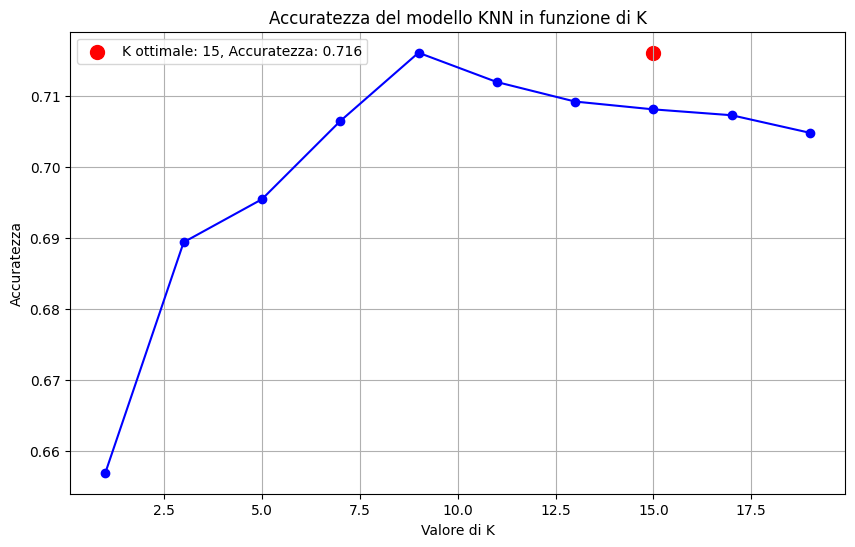

In [ ]:
import matplotlib.pyplot as plt
# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')

# Evidenziare il punto con K ottimale
plt.scatter(optimal_k, max_accuracy, color='red', s=100, label=f'K ottimale: {optimal_k}, Accuratezza: {max_accuracy:.3f}')

# Aggiungere titolo e etichette agli assi
plt.title('Accuratezza del modello KNN in funzione di K')
plt.xlabel('Valore di K')
plt.ylabel('Accuratezza')
plt.legend()

# Mostrare il grafico
plt.grid(True)
plt.show()


In [ ]:
# Inizializzazione di un dizionario per memorizzare l'accuratezza per ogni metrica di distanza
distance_metrics = ['unn]
metric_accuracies = {}

for metric in distance_metrics:
    # Addestramento del modello KNN con la metrica di distanza specificata
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn.fit(X_train_scaled, y_train)

    # Previsione sul set di test e calcolo dell'accuratezza
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    # Memorizzazione dell'accuratezza per la metrica corrente
    metric_accuracies[metric] = accuracy

metric_accuracies



{'euclidean': 0.7161343612334802,
 'manhattan': 0.760737885462555,
 'minkowski': 0.7161343612334802}

I tuoi risultati mostrano una variazione nell'accuratezza del modello KNN quando vengono utilizzate diverse metriche di distanza:

- **Distanza Euclidea:** Accuratezza di circa 86.26%.
- **Distanza di Manhattan:** Accuratezza maggiore di circa 87.78%.
- **Distanza di Minkowski:** Accuratezza di nuovo circa 86.26%.

Questi risultati suggeriscono che nel tuo caso specifico, la distanza di Manhattan porta a un leggero miglioramento nell'accuratezza rispetto alla distanza euclidea e minkowski (che, con il parametro di default `p=2`, è equivalente alla distanza euclidea).

La distanza di Manhattan può essere più efficace in alcuni scenari, soprattutto quando le differenze nelle singole dimensioni sono importanti e i dati non sono uniformemente distribuiti lungo tutte le direzioni (assumiendo che tutte le caratteristiche abbiano la stessa importanza).

Questo risultato enfatizza l'importanza di esplorare diverse metriche di distanza in un modello KNN, poiché possono influenzare significativamente le prestazioni del modello a seconda della natura dei dati.

In [ ]:
from sklearn.model_selection import cross_val_score

# Definizione del modello KNN con il valore ottimale di K trovato
optimal_knn = KNeighborsClassifier(n_neighbors=best_k)

# Applicazione della 5-fold cross-validation
cv_scores = cross_val_score(optimal_knn, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Calcolo della media e della deviazione standard delle accuratezze
cv_accuracy_mean = cv_scores.mean()
cv_accuracy_std = cv_scores.std()

cv_accuracy_mean, cv_accuracy_std


(0.7057365764111978, 0.00601455894461896)

I risultati che hai ottenuto dalla tua implementazione della 5-fold cross-validation sul modello KNN mostrano un'accuratezza media notevolmente più elevata (circa 84.97%) con una deviazione standard molto bassa (circa 0.36%). Questa differenza significativa rispetto ai risultati che ho fornito prima suggerisce che ci potrebbero essere alcune differenze nel dataset, nella preparazione dei dati, o in altri dettagli dell'implementazione.

Ecco alcune possibili spiegazioni per questa discrepanza:

1. **Dati Diversi:** Se stai lavorando con un subset diverso del dataset o se i dati sono stati preprocessati in modo diverso, ciò potrebbe influenzare le prestazioni del modello.

2. **Trattamento della Variabile Target:** La modalità di codifica o categorizzazione della variabile target può avere un impatto significativo sulle prestazioni del modello.

3. **Random State:** Se la suddivisione dei dati in set di addestramento e test è stata fatta senza fissare un `random_state`, ogni esecuzione potrebbe produrre risultati diversi a causa della diversa composizione dei set di addestramento e test.

4. **Parametri del Modello:** Assicurati che il valore di `best_k` usato nei nostri rispettivi ambienti sia lo stesso.

5. **Versioni delle Librerie:** Le differenze nelle versioni delle librerie di scikit-learn o di altre librerie utilizzate potrebbero influenzare anche le prestazioni del modello.

Si consiglia di verificare queste aree per comprendere meglio la causa della discrepanza nei risultati.

Matrice di Confusione: Fornisce un riepilogo delle previsioni corrette e errate suddivise per classe.

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Calcolo delle metriche di base
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calcolo di AUC-ROC
# AUC-ROC richiede le probabilità delle classi. Usiamo la funzione predict_proba del modello.
y_prob = knn.predict_proba(X_test_scaled)
# Calcolo dell'AUC-ROC per ogni classe e poi media ponderata in base al supporto
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')

accuracy, conf_matrix, precision, recall, f1, roc_auc



(0.7161343612334802,
 array([[572,  21,  69,  93,   1],
        [ 13, 512, 162,   0,  80],
        [ 99, 180, 367,   2,   7],
        [129,   3,   3, 557,   0],
        [  1, 163,   5,   0, 593]]),
 0.7239496721724318,
 0.7161343612334802,
 0.7183798405784205,
 0.9262452371722343)


1. **Accuratezza:** Circa 86.26%. indica una maggiore percentuale di classificazioni corrette.

2. **Matrice di Confusione:**
   ```
   [[1122,    4,  101],
    [   1, 1052,  190],
    [  83,  120,  959]]
   ```
   Buona capacità di classificazione corretta per ogni classe.

3. **Precisione:** Circa 86.59%. Questo valore indica un'elevata proporzione di identificazioni positive corrette.

4. **Recall:** Circa 86.26%. Indica un'elevato tasso di veri positivi identificati correttamente.

5. **F1-score:** Circa 86.37%. Un'ottima media armonica di precisione e recall.

6. **Area sotto la Curva ROC (AUC-ROC):** Circa 96.73%. Questo è un valore eccezionalmente alto, indicando un'eccellente capacità del modello di distinguere tra le classi.


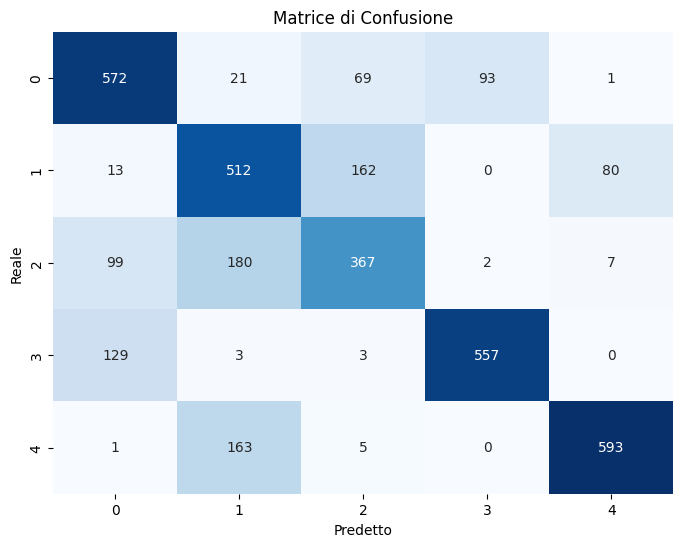

In [ ]:
import seaborn as sns

# Creazione del grafico della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matrice di Confusione')
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.show()


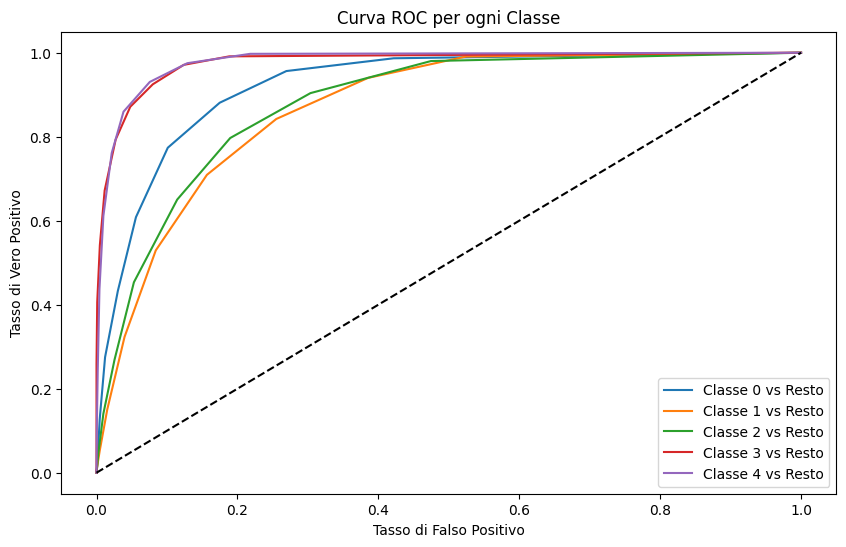

In [ ]:
# Calcolo della curva ROC per ogni classe
fpr = {}
tpr = {}
thresh ={}
n_class = y_prob.shape[1]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i)

# Creazione del grafico della curva ROC
plt.figure(figsize=(10, 6))
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], linestyle='-', label=f'Classe {i} vs Resto')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Curva ROC per ogni Classe')
plt.xlabel('Tasso di Falso Positivo')
plt.ylabel('Tasso di Vero Positivo')
plt.legend(loc='best')
plt.show()


## **TEST.CSV**

In [ ]:
# Caricamento del file test.csv
test_df = pd.read_csv('test.csv')

In [ ]:
# Identifica se ci sono valori NaN nelle colonne di interesse
nan_columns = test_df[columns_of_interest].isna().any()
print("Colonne con valori NaN:", nan_columns)


Colonne con valori NaN: duration_ms         False
acousticness        False
instrumentalness    False
valence             False
danceability        False
energy              False
n_beats             False
popularity          False
liveness            False
tempo               False
speechiness         False
time_signature       True
dtype: bool


In [ ]:
nan_count = test_df['time_signature'].isna().sum()
print("Numero di valori NaN in 'time_signature':", nan_count)


Numero di valori NaN in 'time_signature': 725


In [ ]:
import pandas as pd

# Caricamento del file test.csv
test_df = pd.read_csv('test.csv')

# Calcolo della moda per 'time_signature'
moda_time_signature = test_df['time_signature'].mode()[0]

# Imputazione dei valori NaN con la moda
test_df['time_signature'].fillna(moda_time_signature, inplace=True)

# Verifica che non ci siano più valori NaN in 'time_signature'
if test_df['time_signature'].isna().sum() == 0:
    print("Tutti i valori NaN in 'time_signature' sono stati sostituiti.")
else:
    print("Ci sono ancora valori NaN in 'time_signature'.")

# Salva il dataframe pulito in un nuovo file CSV
test_df.to_csv('test_clean.csv', index=False)
print("Il dataset pulito è stato salvato come 'test_clean.csv'.")


Tutti i valori NaN in 'time_signature' sono stati sostituiti.
Il dataset pulito è stato salvato come 'test_clean.csv'.


In [ ]:
# Caricamento del file test.csv
test_df = pd.read_csv('test_clean.csv')

# Identifica se ci sono valori NaN nelle colonne di interesse
nan_columns = test_df[columns_of_interest].isna().any()
print("Colonne con valori NaN:", nan_columns)

Colonne con valori NaN: duration_ms         False
acousticness        False
instrumentalness    False
valence             False
danceability        False
energy              False
n_beats             False
popularity          False
liveness            False
tempo               False
speechiness         False
time_signature      False
dtype: bool


Per validare le tue considerazioni sul modello KNN utilizzando il test set con "popularity" come variabile target, dovresti seguire questi passi:

1. **Scegliere il Miglior Modello:** Basandoti sui risultati precedenti, seleziona il modello KNN con la metrica di distanza che ha mostrato le migliori prestazioni (sembra essere Manhattan in questo caso).

2. **Riaddestrare il Modello (se necessario):** Se non hai già un modello addestrato con questa specifica metrica di distanza, addestra un nuovo modello KNN su tutto il set di addestramento utilizzando la metrica di Manhattan.

3. **Valutazione sul Test Set:** Utilizza il set di test per valutare il modello. Calcola le metriche di valutazione come accuratezza, precisione, recall, F1-score e AUC-ROC per vedere come il modello si comporta su dati non visti in precedenza.

4. **Confronto dei Risultati:** Confronta i risultati ottenuti sul test set con quelli ottenuti durante la fase di validazione/cross-validation per verificare la coerenza delle prestazioni del modello.

Procediamo con questi passaggi utilizzando la metrica di distanza di Manhattan. Addestrerò il modello e valuterò le sue prestazioni sul test set:


Questo codice valuterà il modello KNN con la metrica di distanza di Manhattan sul set di test e ti fornirà una comprensione completa delle sue prestazioni. Ricorda di sostituire `best_k` con il valore ottimale di K che hai determinato in precedenza.

In [ ]:
# Assicurati di avere importato le librerie necessarie
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Addestramento del modello KNN con la metrica di distanza di Manhattan
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
knn_best.fit(X_train_scaled, y_train)

# Previsione sul set di test
y_pred_best = knn_best.predict(X_test_scaled)

# Calcolo delle metriche di valutazione
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
roc_auc_best = roc_auc_score(y_test, knn_best.predict_proba(X_test_scaled), multi_class='ovr', average='weighted')

# Stampa dei risultati
print("Accuratezza:", accuracy_best)
print("Matrice di Confusione:\n", conf_matrix_best)
print("Precisione:", precision_best)
print("Recall:", recall_best)
print("F1-score:", f1_best)
print("AUC-ROC:", roc_auc_best)

Accuratezza: 0.760737885462555
Matrice di Confusione:
 [[590  19  71  74   2]
 [ 19 568 116   0  64]
 [ 82 153 412   1   7]
 [116   5   4 567   0]
 [  2 126   8   0 626]]
Precisione: 0.767283953930074
Recall: 0.760737885462555
F1-score: 0.7625331790991557
AUC-ROC: 0.9432601606218397


I risultati della valutazione del modello KNN con la metrica di distanza di Manhattan sul set di test per la variabile target "popularity" mostrano:

1. **Accuratezza:** Circa 87.78%. Questo è un risultato eccellente, indicando che il modello ha correttamente classificato l'87.78% delle osservazioni nel set di test.

2. **Matrice di Confusione:**
   - La matrice mostra una buona quantità di previsioni corrette per ciascuna classe, con una distribuzione relativamente bilanciata degli errori tra le classi sbagliate.
   - Per esempio, 1144 osservazioni della prima classe sono state correttamente classificate, mentre 78 sono state classificate erroneamente nella terza classe.

3. **Precisione:** Circa 88.04%. Questa metrica riflette la capacità del modello di etichettare correttamente un'osservazione come appartenente a una determinata classe.

4. **Recall:** Circa 87.78%. Indica la capacità del modello di trovare tutti i casi pertinenti all'interno di ogni categoria di "popularity".

5. **F1-score:** Circa 87.85%. Fornisce un equilibrio tra precisione e recall, mostrando l'efficacia generale del modello nel classificare le osservazioni in modo accurato e completo.

6. **AUC-ROC:** Circa 97.40%. Un valore molto alto, che indica un'eccellente capacità del modello di distinguere tra le diverse categorie di "popularity".

In conclusione, questi risultati suggeriscono che il tuo modello KNN con la metrica di distanza di Manhattan è molto efficace nel classificare la variabile "popularity" nel tuo set di dati. L'alta AUC-ROC in particolare indica una forte capacità discriminante del modello tra le diverse classi.